In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coords
import gapipes as gp

In [3]:
plt.style.use('smoh')

In [4]:
%store -r nearby

In [5]:
d = pd.read_hdf('/Users/semyeong/projects/spelunky/hyades-tails/spelunky_data.h5', 'df')

In [6]:
uwe0 = gp.calculate_uwe0(d['bp_rp'].values, d['phot_g_mean_mag'])
d['uwe'] /= uwe0

In [7]:
d = d.loc[d['uwe']<1.1].reset_index(drop=True)

In [8]:
v_icrs_rect = np.array([-5.96, 45.6, 5.57])  # Reino et al. 2018

In [9]:
drv = d.loc[d['radial_velocity'].notna()]
dv = np.linalg.norm(
    drv.g.icrs.cartesian.differentials['s'].d_xyz.value - v_icrs_rect[:,None], axis=0)

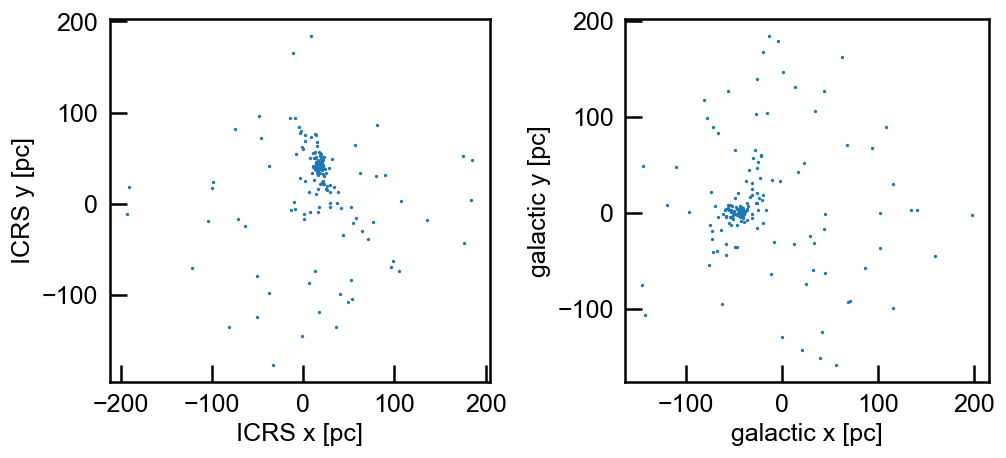

In [10]:
dhy = drv.loc[dv<2]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(dhy.g.icrs.cartesian.x, dhy.g.icrs.cartesian.y, s=1);
ax[1].scatter(dhy.g.galactic.cartesian.x, dhy.g.galactic.cartesian.y, s=1);
for cax in ax: cax.set_aspect('equal')
ax[0].set_xlabel('ICRS x [pc]')
ax[0].set_ylabel('ICRS y [pc]')
ax[1].set_xlabel('galactic x [pc]')
ax[1].set_ylabel('galactic y [pc]');

In [32]:
pd.DataFrame({'a':[1.,2.,3.], 'b':['a','b','c']})['a']

0    1.0
1    2.0
2    3.0
Name: a, dtype: float64

In [14]:
dhy.iloc[0]

source_id                       6.067125e+18
ra                              2.010364e+02
dec                            -5.459786e+01
parallax                        8.510905e+00
pmra                           -7.947468e+01
pmdec                          -1.116554e+01
radial_velocity                -1.119838e+01
parallax_error                  3.934246e-02
pmra_error                      7.629328e-02
pmdec_error                     6.411786e-02
radial_velocity_error           2.738152e-01
parallax_over_error             2.163288e+02
bp_rp                           7.811604e-01
phot_g_mean_mag                 9.747662e+00
phot_bp_mean_mag                1.007562e+01
phot_rp_mean_mag                9.294463e+00
phot_g_mean_flux_over_error     2.908407e+03
phot_bp_mean_flux_over_error    7.961315e+02
phot_rp_mean_flux_over_error    7.593977e+02
uwe                             1.055708e+00
rv_nb_transits                  3.000000e+00
Name: 1799, dtype: float64

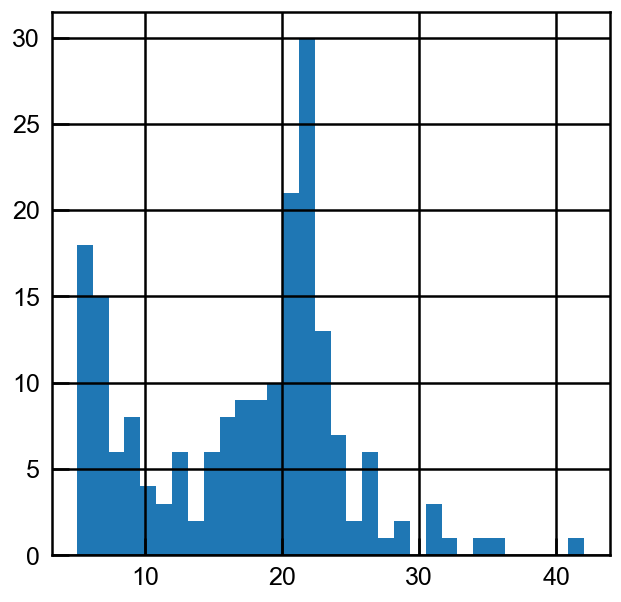

In [10]:
dhy['parallax'].hist(bins=32);

In [11]:
dhy['parallax'].median()

19.223987794553068

In [12]:
sub = d.loc[(d['uwe'] < 1.1) & (np.abs(d['parallax']-21)<1)]

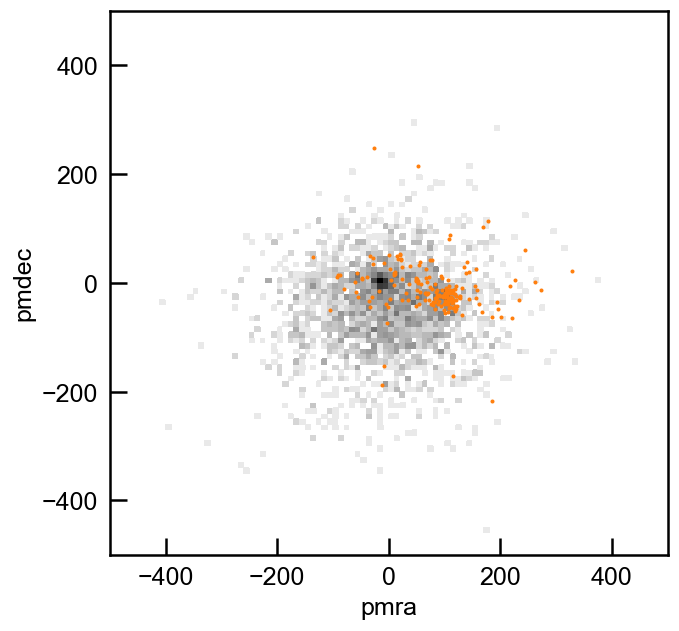

In [85]:
fig, ax = plt.subplots()
plt.hist2d(sub['pmra'], sub['pmdec'], bins=np.linspace(-500,500,101), norm=colors.LogNorm(), cmap='Greys');
dhy.plot.scatter('pmra', 'pmdec', ax=ax, c='tab:orange', s=2);

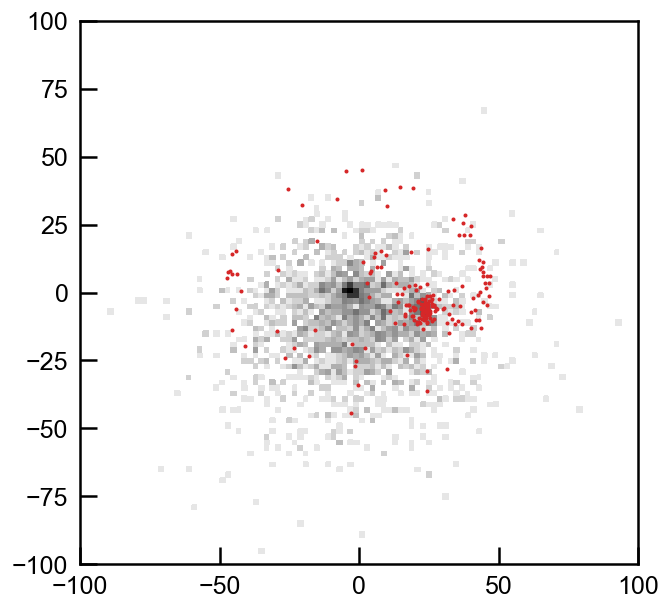

In [19]:
fig, ax = plt.subplots()
plt.hist2d(sub.g.vra, sub.g.vdec, bins=np.linspace(-100,100,101), norm=colors.LogNorm(), cmap='Greys');
ax.scatter(dhy.g.vra, dhy.g.vdec, s=2, color='tab:red')
# dhy.plot.scatter('pmra', 'pmdec', ax=ax, c='tab:orange', s=2);

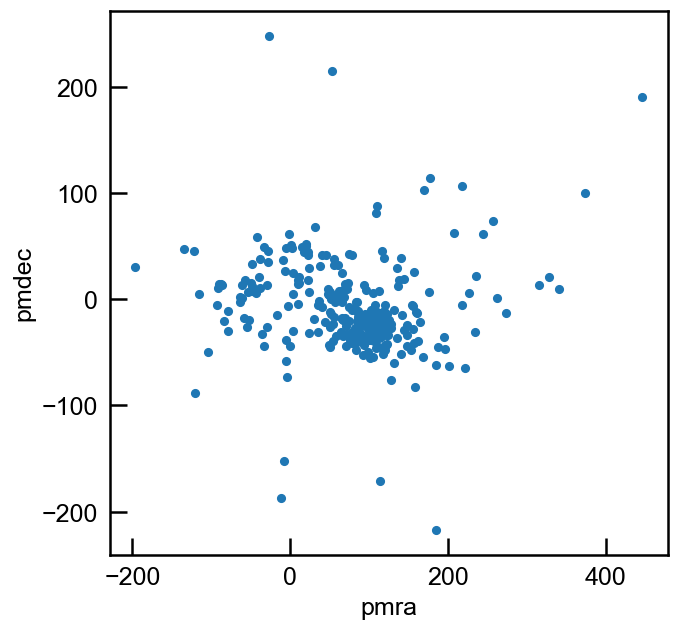